<a href="https://colab.research.google.com/github/cuongle2002/BTVNW5-FUZZYLOGIC-/blob/main/ScienceDirect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=edfc54c39cbb0bc44c82f0343447fabf4456e403b68fe2f8075cc0e4b536e31b
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


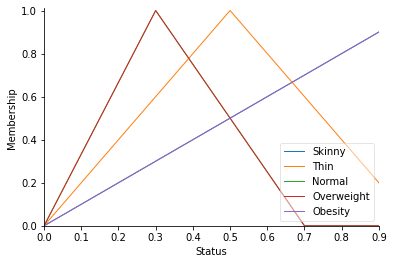

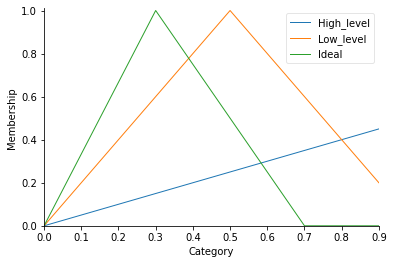

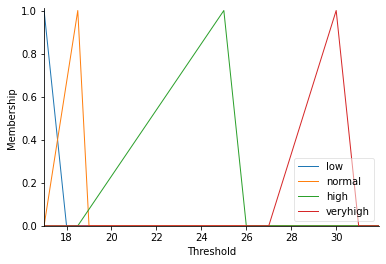

In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Status = ctrl.Antecedent(np.arange(0,1,0.1), 'Status')
Category = ctrl.Antecedent(np.arange(0,1,0.1), 'Category')
Threshold = ctrl.Consequent(np.arange(17,32,0.1), 'Threshold')

Status['Skinny'] = fuzz.trimf(Status.universe,[0, 1, 2])
Status['Thin'] = fuzz.trimf(Status.universe,[0, 0.5, 1])
Status['Normal'] = fuzz.trimf(Status.universe,[0, 0.3, 0.7])
Status['Overweight'] = fuzz.trimf(Status.universe,[0, 0.3, 0.7])
Status['Obesity'] = fuzz.trimf(Status.universe,[0, 1, 1.5])

Category['High_level'] = fuzz.trimf(Category.universe,[0, 2, 2.5])
Category['Low_level'] = fuzz.trimf(Category.universe,[0, 0.5, 1])
Category['Ideal'] = fuzz.trimf(Category.universe,[0, 0.3, 0.7])
Category['Low_level'] = fuzz.trimf(Category.universe,[0, 0.5, 1])
Category['High_level'] = fuzz.trimf(Category.universe,[0, 2, 2.5])


Threshold['low'] = fuzz.trimf(Threshold.universe,[0, 17, 18])
Threshold['normal'] = fuzz.trimf(Threshold.universe,[17, 18.5, 19])
Threshold['high'] = fuzz.trimf(Threshold.universe,[18.5, 25, 26])
Threshold['veryhigh'] = fuzz.trimf(Threshold.universe,[25, 27, 28])
Threshold['veryhigh'] = fuzz.trimf(Threshold.universe,[27, 30, 31])

Status.view()
Category.view()
Threshold.view()







25.937396033269366


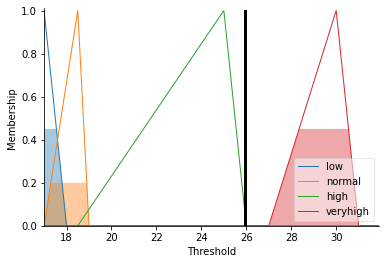

In [22]:
rule1 = ctrl.Rule(Status['Skinny'] & Category['High_level'],Threshold['low'])
rule2 = ctrl.Rule(Status['Thin'] & Category['Low_level'],Threshold['normal'])
rule3 = ctrl.Rule(Status['Normal'] & Category['Ideal'],Threshold['high'])
rule4 = ctrl.Rule(Status['Overweight'] & Category['Low_level'],Threshold['veryhigh'])
rule5 = ctrl.Rule(Status['Obesity'] & Category['High_level'],Threshold['veryhigh'])


Thresholding_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
Thresholding = ctrl.ControlSystemSimulation(Thresholding_ctrl)
Thresholding.input['Status'] = 5
Thresholding.input['Category'] = 10


Thresholding.compute()
print(Thresholding.output['Threshold']) 
Threshold.view(sim = Thresholding)


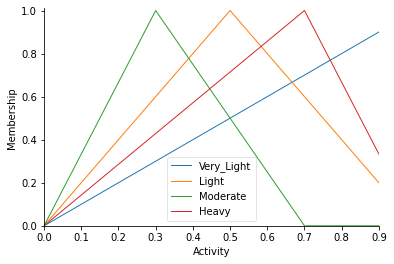

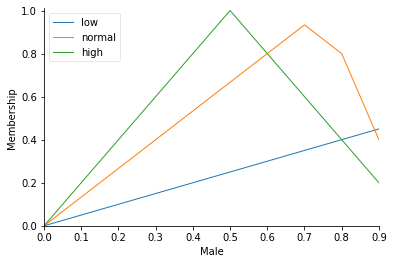

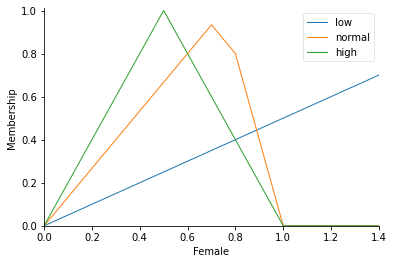

In [23]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Activity = ctrl.Antecedent(np.arange(0,1,0.1), 'Activity')
Male = ctrl.Antecedent(np.arange(0,1,0.1), 'Male')
Female = ctrl.Consequent(np.arange(0,1.5,0.1), 'Female')

Activity['Very_Light'] = fuzz.trimf(Activity.universe,[0, 1, 2])
Activity['Light'] = fuzz.trimf(Activity.universe,[0, 0.5, 1])
Activity['Moderate'] = fuzz.trimf(Activity.universe,[0, 0.3, 0.7])
Activity['Heavy'] = fuzz.trimf(Activity.universe,[0, 0.7, 1])


Male['low'] = fuzz.trimf(Male.universe,[0, 2, 2.5])
Male['normal'] = fuzz.trimf(Male.universe,[0, 0.75, 1])
Male['high'] = fuzz.trimf(Male.universe,[0, 0.3, 0.7])
Male['high'] = fuzz.trimf(Male.universe,[0, 0.5, 1])



Female['low'] = fuzz.trimf(Female.universe,[0, 2, 2.5])
Female['normal'] = fuzz.trimf(Female.universe,[0, 0.75, 1])
Female['high'] = fuzz.trimf(Female.universe,[0, 0.3, 0.7])
Female['high'] = fuzz.trimf(Female.universe,[0, 0.5, 1])


Activity.view()
Male.view()
Female.view()

0.8420765027322407


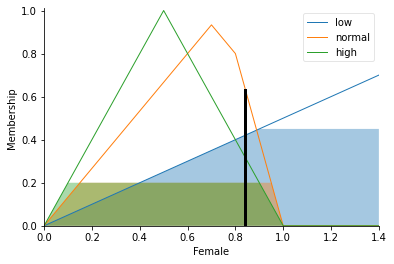

In [29]:
rule1 = ctrl.Rule(Activity['Very_Light'] & Male['low'],Female['low'])
rule2 = ctrl.Rule(Activity['Light'] & Male['normal'],Female['normal'])
rule3 = ctrl.Rule(Activity['Moderate'] & Male['high'],Female['high'])
rule4 = ctrl.Rule(Activity['Heavy'] & Male['high'],Female['high'])



femaling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
femaling = ctrl.ControlSystemSimulation(femaling_ctrl)
femaling.input['Activity'] = 1
femaling.input['Male'] = 2.5


femaling.compute()
print(femaling.output['Female']) 
Female.view(sim = femaling)
